In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re


sys.path.insert(0, 'C:/Users/ragna/Documents/Ragnar/Code/MMDGraph')
#from importlib import reload
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
#reload(readfoldertopanda)
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC


In [87]:
keys = ['sizes_1','sizes_2', 'n', 'm', 'diff']
params_kernel = {}
data_auc = dict()
data = {}

# RW

In [114]:
data['RW'] = readfoldertopanda("../data/SBMTopology/RW")
data['RW'].columns
np.unique(data['RW']['type'].loc[data['RW']['diff'] == 0.08])

array(['ARKU_plus', 'exponential', 'p-rw'], dtype=object)

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


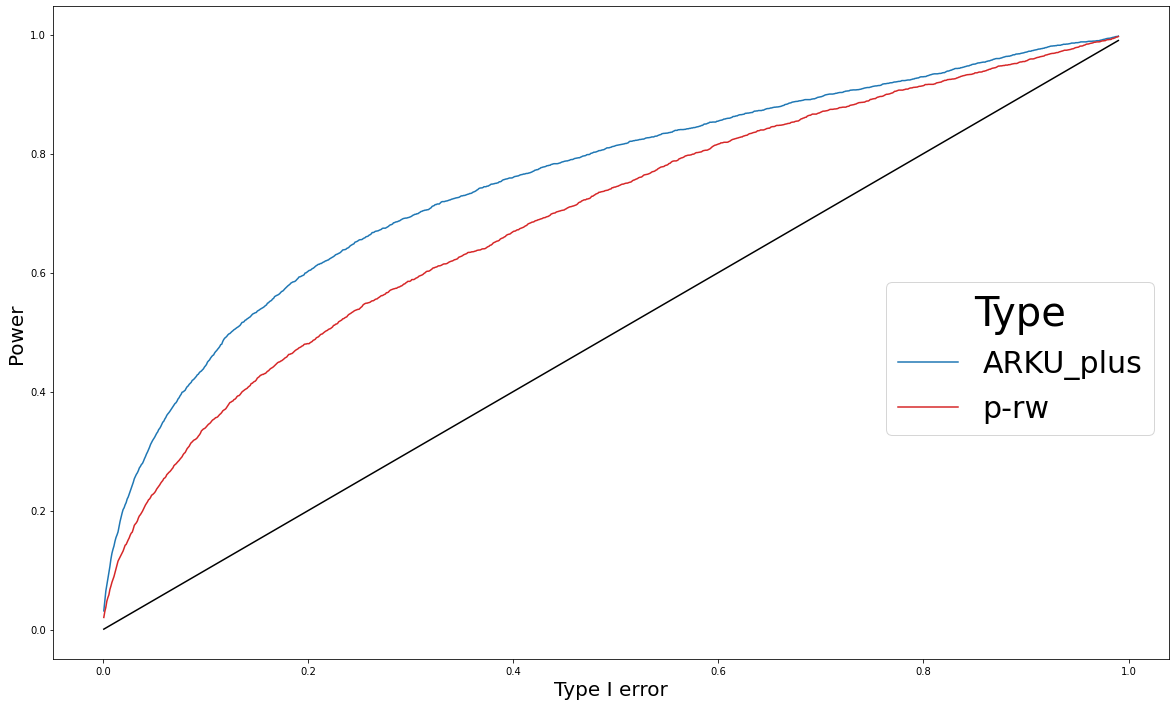

In [120]:
params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'diff':0.08,
                'discount':0.001,
                'r':4
                }


plotVaryingBGDEG(df = data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))], param_vary_name = "type", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Type')

params_kernel['RW'] = ['normalize', 'r', 'discount', 'type', 'tmax']
data_auc['RW'] = findAUC(keys = keys, params = params_kernel['RW'], stats = ['MMD_b', 'MMD_u'], df = data['RW'] )


# WL

In [91]:
data['WL'] = readfoldertopanda("../data/SBMTopology/WL")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
print(np.unique(data['WL']['normalize']))
data['WL'].columns

[0]


Index(['kernel', 'alpha', 'diff', 'normalize', 'probs_1', 'sizes_1', 'probs_2',
       'sizes_2', 'n', 'm', 'timestap', 'B', 'N', 'run_time', 'MMD_b',
       'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'nitr', 'with_labels',
       'sinkhorn'],
      dtype='object')

In [25]:
np.unique(data['WL']['N'])

array([1000, 3000], dtype=int64)

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


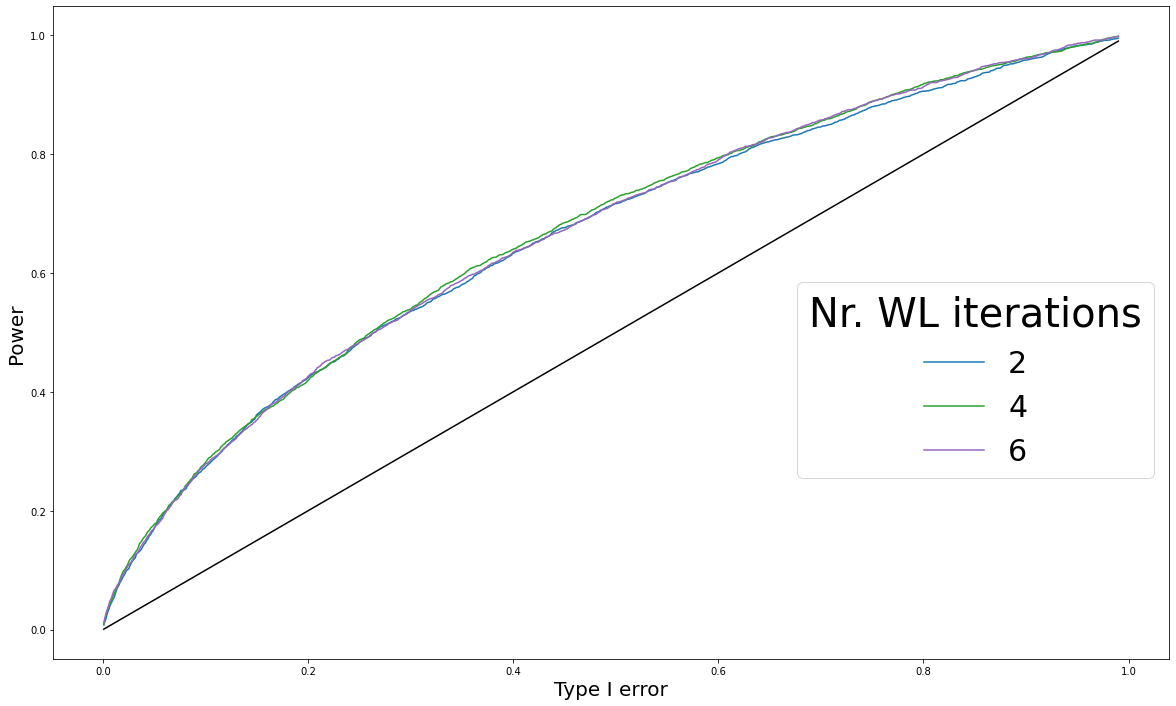

In [92]:
params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'diff':0.08,
                'N':3000
                }


plotVaryingBGDEG(df = data['WL'].copy(), param_vary_name = "nitr", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. WL iterations')


params_kernel['WL'] = ['nitr', 'normalize']
data_auc['WL'] = findAUC(keys = keys, params = params_kernel['WL'], stats = ['MMD_b', 'MMD_u'], df = data['WL'] )

# PROP

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


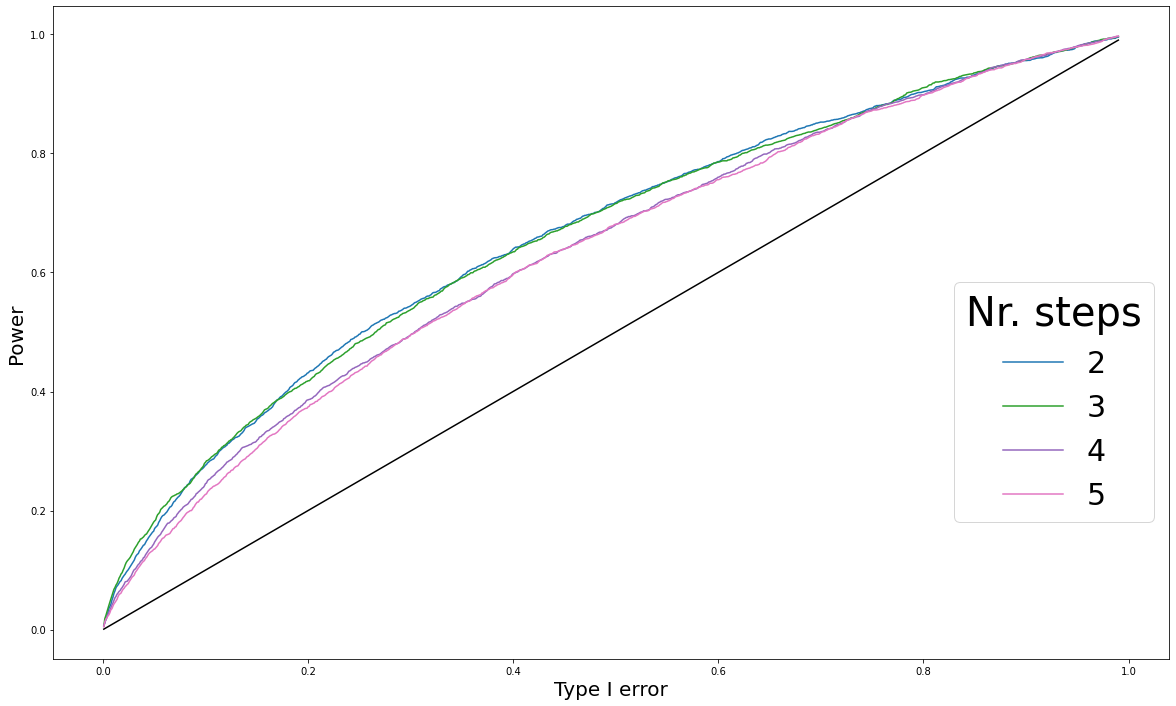

,sizes_1,sizes_2,n,m,diff,normalize,w,M,tmax,MMD_b_auc,MMD_u_auc
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,0.0001,H,2,0.651682,0.651673
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.10,0,0.0001,H,2,0.765570,0.765623
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,0.0010,H,2,0.649818,0.649818
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.10,0,0.0010,H,2,0.776930,0.776937
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,0.0100,H,2,0.654023,0.654031


In [93]:
name = 'PROP'
data['PROP'] = readfoldertopanda("../data/SBMTopology/PROP")
params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'diff':0.08,
                'normalize':0,
                'w':0.01
                }


plotVaryingBGDEG(df = data['PROP'].copy(), param_vary_name = "tmax", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. steps')


params_kernel[name] = [ 'normalize', 'w', 'M', 'tmax']
data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()


# Pyramid

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


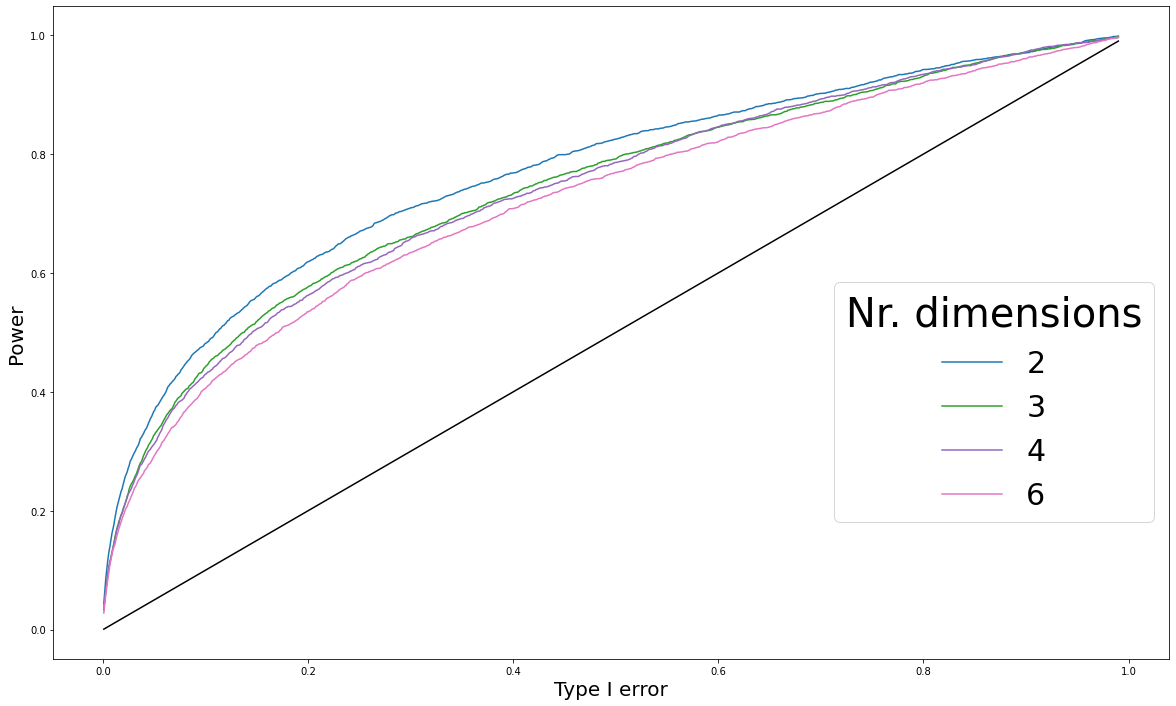

,sizes_1,sizes_2,n,m,diff,normalize,dim,L,with_labels,MMD_b_auc,MMD_u_auc
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,2,10,False,0.760426,0.760426
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,2,10,True,0.743636,0.743636
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,3,10,False,0.721714,0.721714
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,3,10,True,0.719881,0.719881
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,4,10,False,0.701802,0.701802


In [111]:
name = 'PYRAMID'
data['PYRAMID'] = readfoldertopanda("../data/SBMTopology/PYRAMID")
params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'diff':0.08,
                #'dim':2,
                'with_labels':False,
                'L':8
                }


plotVaryingBGDEG(df = data['PYRAMID'].copy(), param_vary_name = "dim", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title='Nr. dimensions')

params_kernel[name] = ['normalize', 'dim', 'L', 'with_labels']
data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()

# SP

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


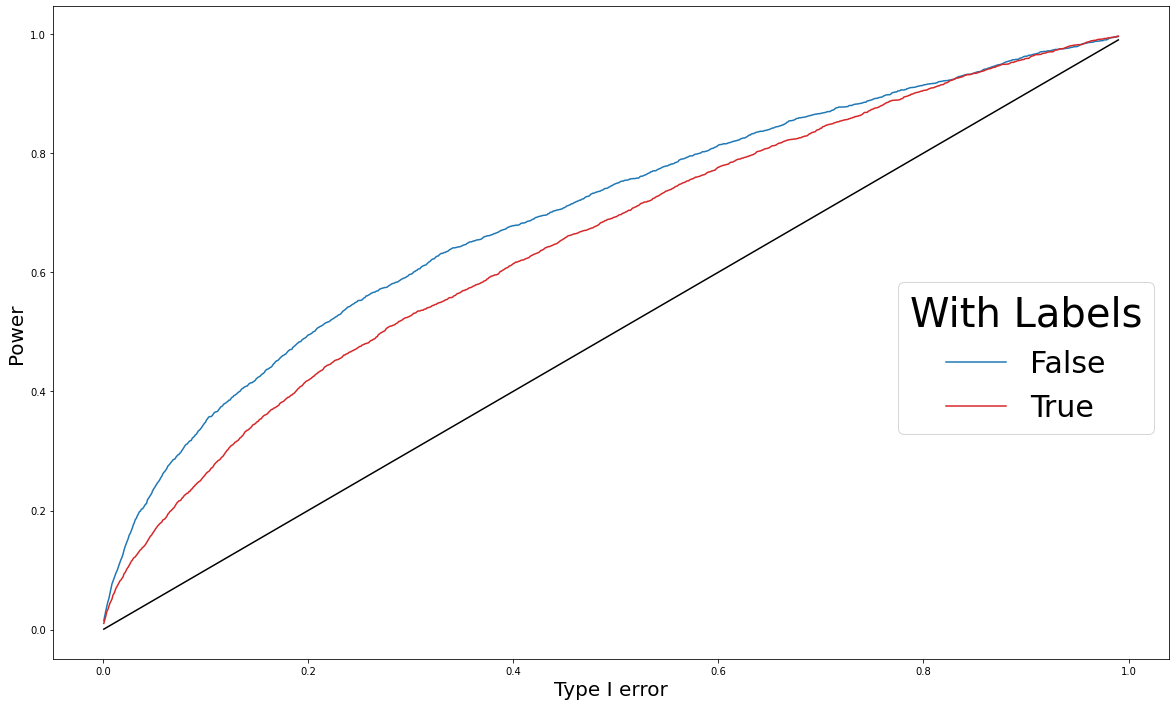

,sizes_1,sizes_2,n,m,diff,normalize,with_labels,MMD_b_auc,MMD_u_auc
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.10,0,True,0.784447,0.784447
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,False,0.687269,0.687269
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,True,0.643116,0.643116


In [110]:
data['SP'] = readfoldertopanda("../data/SBMTopology/SP")
data['SP'].loc[data['SP']['N'] == 3000]
params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'N':3000
                }


plotVaryingBGDEG(df = data['SP'].copy(), param_vary_name = "with_labels", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'With Labels')

params_kernel['SP'] = [ 'normalize', 'with_labels']
data_auc['SP']  = findAUC(keys = keys, params = params_kernel['SP'], stats = ['MMD_b', 'MMD_u'], df = data['SP'] )
data_auc['SP'].head()

# WWL

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


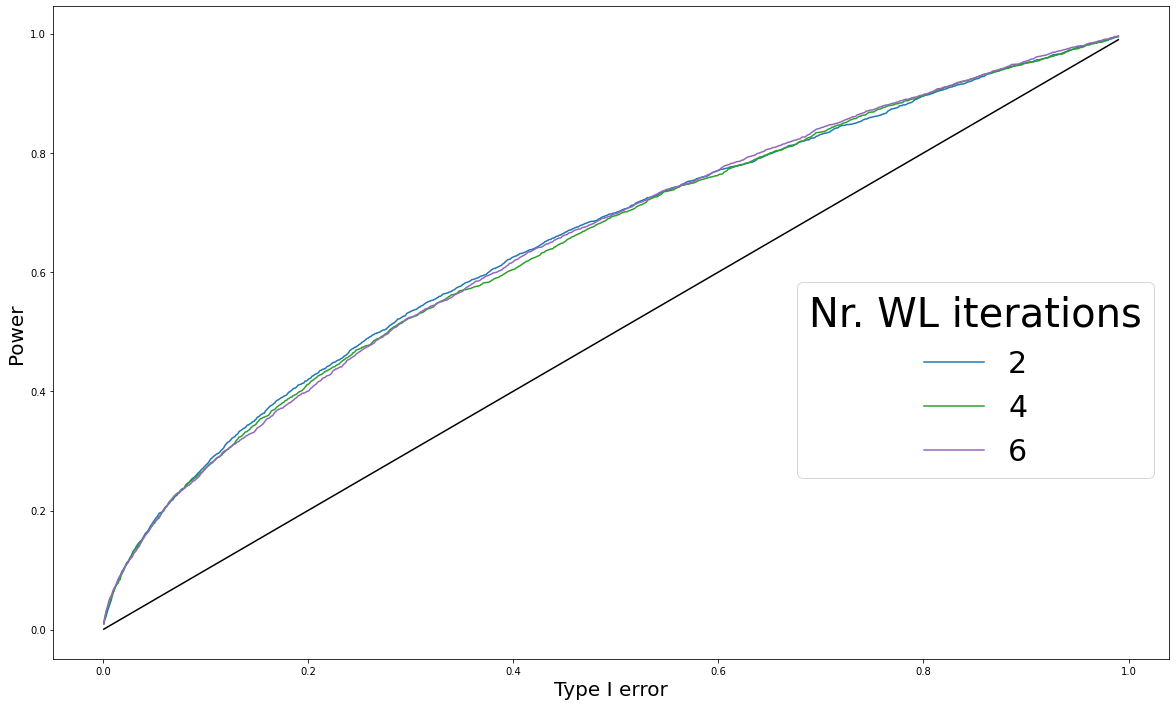

,sizes_1,sizes_2,n,m,diff,normalize,nitr,discount,sinkhorn,MMD_b_auc,MMD_u_auc
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,2,0.001,False,0.637266,0.637266
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.10,0,2,0.001,False,0.794640,0.794640
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,2,0.010,False,0.643886,0.643886
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.10,0,2,0.010,False,0.801700,0.801700
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,2,0.100,False,0.647532,0.647532


In [98]:
name = 'WWL'
data['WWL'] = readfoldertopanda("../data/SBMTopology/WWL")
params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'discount':0.01,
                'N':3000
                #'nitr':4
                }


plotVaryingBGDEG(df = data['WWL'].copy(), param_vary_name = "nitr", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. WL iterations')


params_kernel[name] = [ 'normalize', 'nitr', 'discount', 'sinkhorn']
data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()


# WLOA

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


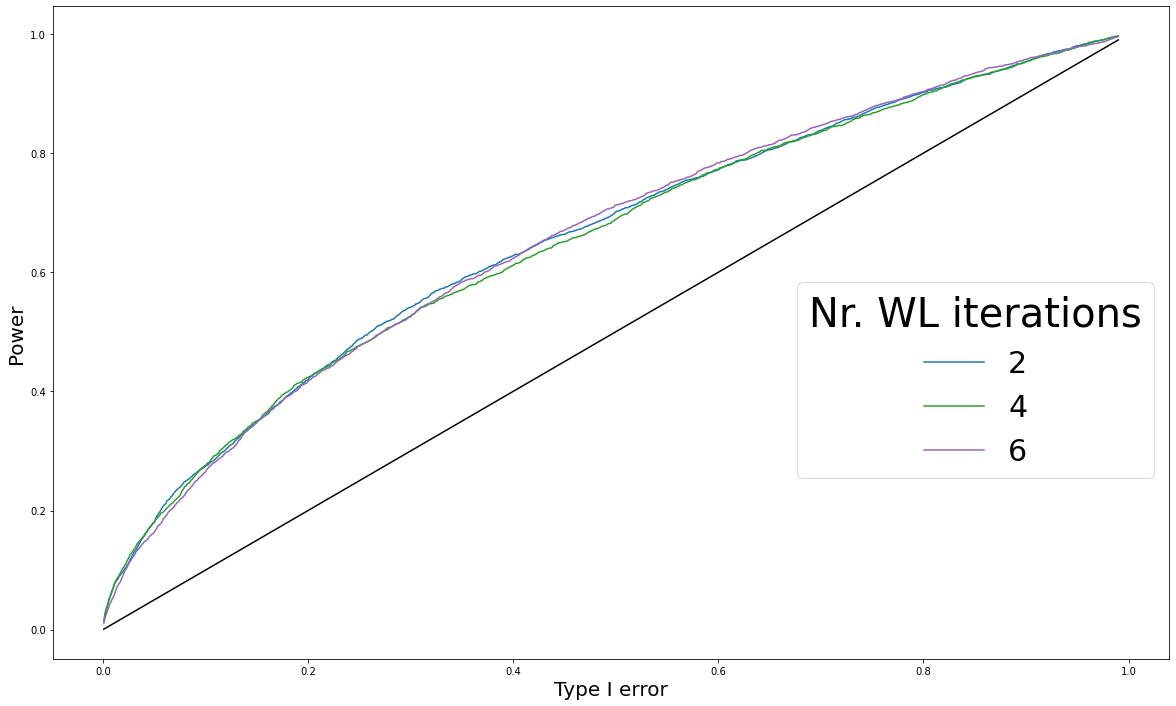

,sizes_1,sizes_2,n,m,diff,normalize,nitr,MMD_b_auc,MMD_u_auc
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,2,0.647612,0.647603
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.10,0,2,0.794463,0.794537
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,4,0.643136,0.643161
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.10,0,4,0.789327,0.789307
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,6,0.647350,0.647359


In [99]:
name = 'WLOA'
data['WLOA'] = readfoldertopanda("../data/SBMTopology/WLOA")
params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'N':3000
                #'nitr':4
                }


plotVaryingBGDEG(df = data['WLOA'].copy(), param_vary_name = "nitr", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. WL iterations')

params_kernel[name] = ['normalize', 'nitr']
data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()

# DK

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


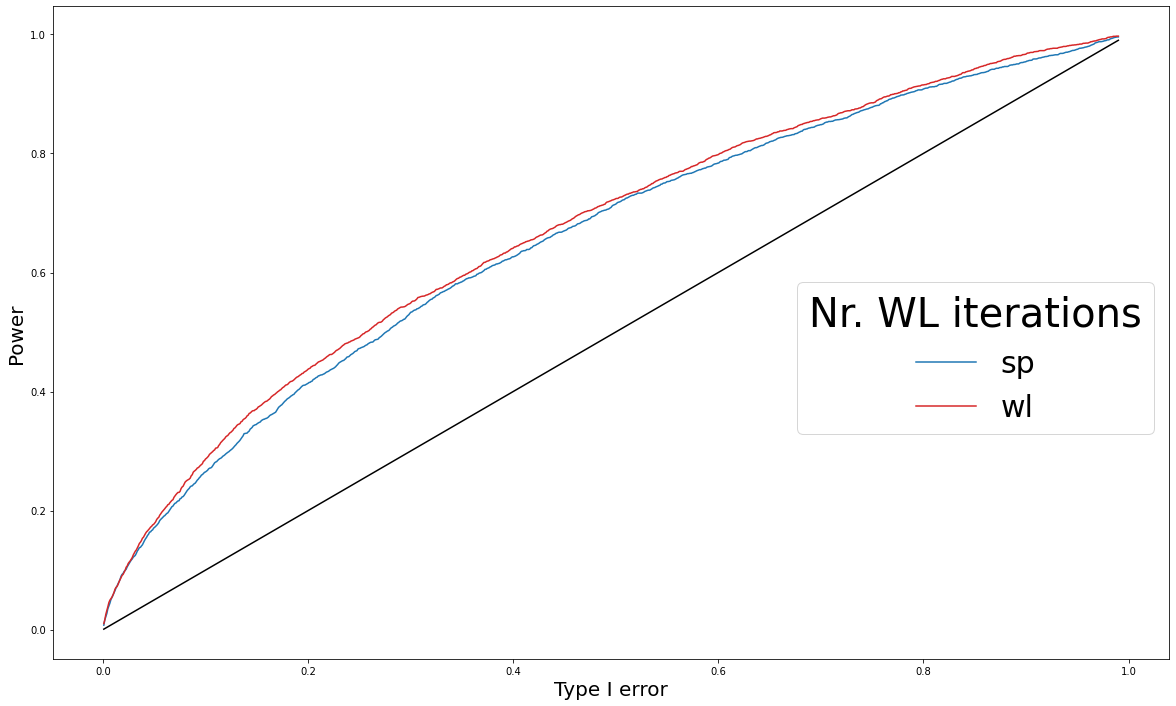

,sizes_1,sizes_2,n,m,diff,normalize,nitr,type,MMD_b_auc,MMD_u_auc
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,2,wl,0.645289,0.645297
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.10,0,2,wl,0.779270,0.779279
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,4,wl,0.661160,0.661165
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.10,0,4,wl,0.769343,0.769355
0,"[50, 30, 35]","[50, 30, 35]",20,20,0.08,0,6,wl,0.648641,0.648642


In [100]:
name = 'DK'
data['DK'] = readfoldertopanda("../data/SBMTopology/DK")
params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'N':3000
                }


plotVaryingBGDEG(df = data['DK'].loc[data['DK']['nitr'] == 4].copy(), param_vary_name = "type", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. WL iterations')


params_kernel[name] = ['normalize', 'nitr', 'type']

data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
data_auc[name].head()


In [84]:
data['RW']['sizes_1'].loc[data['RW']['diff'] == 0.08].iloc[0]

'[50, 30, 35]'

In [86]:
keys

['probs_1', 'probs_2', 'sizes_1', 'sizes_2', 'n', 'm', 'diff']

# ALL

In [121]:

key_pair = pd.DataFrame({'n':20,
                'm':20,
                'diff':0.08,
                'sizes_1':'[50, 30, 35]',
                'sizes_2':'[50, 30, 35]'
                
                },
                 index = [0])

                # 'probs_1':'[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0.07 0.2 ]]', 
                # 'probs_2':'[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0.07 0.2 ]]', 
                # 'sizes_1':'[30, 20, 25]',
                # 'sizes_2':'[30, 20, 25]',

stat = 'MMD_u_auc'
stat_plot = 'MMD_u'

best = []

for k,v in data.items():
    print(k)

    k_data_max = data_auc[k].reset_index().merge(key_pair, on = keys)
    k_data_max = k_data_max[k_data_max.groupby(keys)[stat].transform(max) == k_data_max[stat]].iloc[[0]]
    tmp_data = v.reset_index().merge(k_data_max, on = keys + params_kernel[k])
    tmp_data['kernel_name'] = k
    best.append(tmp_data)


RW
WL
PROP
PYRAMID
SP
WWL
WLOA
DK


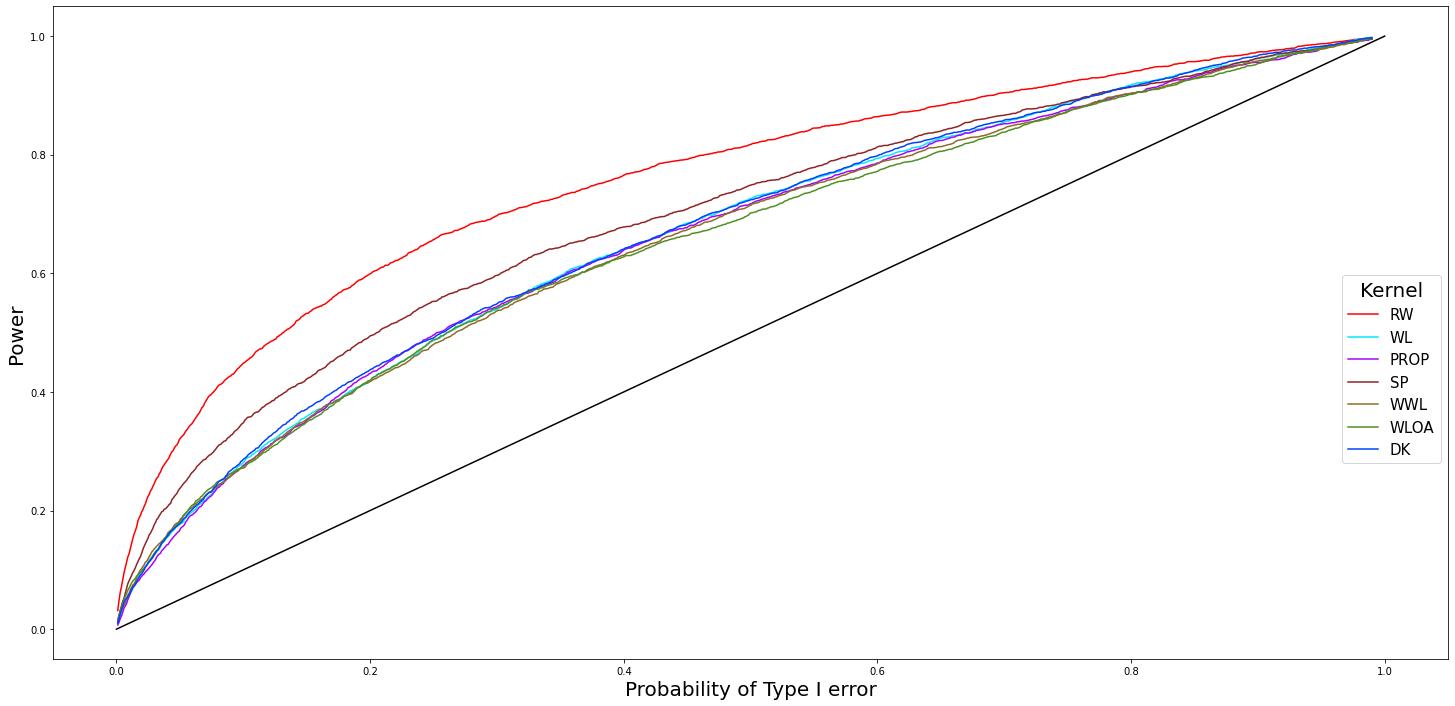

In [123]:
_, ax = plt.subplots(figsize = (25,12))


label = []
#icefire
#cmap = get_cmap(sns.color_palette("viridis", as_cmap=True)) # type: matplotlib.colors.ListedColormap
colors = ['#FF0000',  '#00EAFF', '#AA00FF', '#FF7F00', '#8F2323', '#8F6A23', '#4F8F23', '#0040FF', '#737373', '#23628F']# cmap.colors[::int(len(cmap.colors)/(7+1))]  # type: list

for i,row in enumerate(best):

    if str(row['kernel_name'].iloc[0]) == 'PYRAMID':
        continue

    ax.plot(row['alpha'], row[stat_plot], color =colors[i], label=str(row['kernel_name'].iloc[0]))
    label.append(str(row['kernel_name'].iloc[0]))

ax.plot([0,1], [0,1], color = 'black')
# ax.plot(graph_stat['alpha'], graph_stat['average_degree'], color =colors[i+1], label='average_degree')
# label.append('average_degree')



h, l = ax.get_legend_handles_labels()

ax.legend(handles=h, labels=label, 
        handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)}, title = 'Kernel', bbox_to_anchor=(1, 0.6), fontsize = 15, title_fontsize=20)

ax.set_xlabel('Probability of Type I error', fontsize = 20)
ax.set_ylabel('Power', fontsize = 20)
# ax.set_title(f'Number of samples = {key_pair["n"].iloc[0]}, Noise = {key_pair["noise"].iloc[0]}', fontsize = 20)



plt.show()